# Assignment1 과제 설명
## Classification Metrics
- 1. 주어진 데이터 (sampled_data.csv)에 대해 로지스틱 회귀모형 적합해보고, Mean Accuracy 찍어보기 -> sklearn
- 2. Confusion Matrix 찍어보기 -> Mean Accuracy와 비교
- 3. 최적의 Cut-off를 ROC 커브 사용해서 찾아보기, 새로운 cut off로 예측을 다시 진행하여 성능 평가 진행

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("sampled_data.csv")
data.isnull().sum(axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df = pd.DataFrame(data)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

"""
데이터 스케일링은 train test split 다음에 하셔야 합니다!  
트레인셋 테스트셋 분리 이전에 데이터 스케일링을 한다면  
테스트셋의 정보가 스케일링 시에 반영이 되기 때문입니다!  
과제 진행 시 참고해주세요.
"""

In [6]:
target = df['Class']
target.value_counts()

0    28428
1       52
Name: Class, dtype: int64

### Logistic Regression
1. sklearn 불러옴
2. train test split
3. train -> test , class 예측
4. scaling
5. 스케일 버전train -> test , class 예측
5. Mean Accuracy


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train -> test, calss 예측  
Mean Accuracy

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], random_state = 0)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21360, 30), (7120, 30), (21360,), (7120,))

In [10]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\jinji\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
# Mean Accuracy
classifier.score(X_test,y_test)

0.999438202247191

scaled train,test split  
train -> test 예측

In [13]:
from sklearn.preprocessing import StandardScaler

In [45]:
# train,test split
X2_train, X2_test, y2_train, y2_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], random_state = 0)
X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape

((21360, 30), (7120, 30), (21360,), (7120,))

In [46]:
X2_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
8000,40450,1.131228,-1.612728,0.658765,-1.364990,-1.712647,0.045033,-1.215284,0.085225,-1.930448,...,-0.020626,0.111172,0.420707,-0.116693,0.027197,0.196221,-0.107498,0.039437,0.039779,158.00
14004,164219,2.086565,0.104547,-1.340502,0.319618,0.163126,-1.251715,0.352600,-0.479160,0.388456,...,-0.149764,0.251621,0.967181,-0.035153,-0.033537,0.336976,-0.106266,-0.010242,-0.057136,1.00
7628,130962,1.841639,-1.002806,-0.718181,0.136236,0.074779,2.046166,-1.184891,0.644623,-0.383715,...,-0.599734,-0.368793,-0.622324,0.422341,-1.073885,-0.672641,-0.845913,0.108824,-0.030317,64.00
10725,171923,0.747710,0.745767,-1.857361,-0.555697,1.008044,-0.035079,-0.253724,-2.849674,-0.600436,...,0.419393,-1.124999,0.843768,-0.080762,0.253989,0.606719,0.618415,-0.027468,0.163375,0.76
4266,161506,2.013512,-0.182635,-1.028844,0.333376,-0.237616,-0.971287,0.001305,-0.125545,0.457117,...,-0.294818,-0.245713,-0.667236,0.354399,0.044589,-0.381213,0.176797,-0.082116,-0.071885,0.99


In [47]:
# Scaling
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 0.87599191,  1.10227326, -0.01383661, ..., -0.29889867,
        -0.34162683, -0.04276894],
       [ 0.46599202,  1.08762774, -0.04747727, ..., -0.19381068,
        -0.29798293, -0.04276894],
       [-1.4021752 ,  0.60496356,  0.12384231, ...,  0.08768119,
        -0.28521635, -0.04276894],
       ...,
       [-0.42810237, -1.77186915, -0.42136644, ..., -0.90645255,
         0.37580428, -0.04276894],
       [ 0.90608364,  0.67055034, -1.06901447, ...,  0.00759972,
         1.21623571, -0.04276894],
       [-1.90993121,  0.72058018, -0.22056932, ...,  0.07781589,
        -0.25934387, -0.04276894]])

In [48]:
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.fit_transform(X2_test)   
y2_train = y_train
y2_test = y_test

In [49]:
classifier2 = LogisticRegression()
classifier2.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred2 = classifier2.predict(X2_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
# Mean Accuracy
classifier2.score(X2_test,y2_test)
# 0.998876404494382 스케일 전 보다 떨어짐

0.9998595505617978

target데이터가 편향되어 있음.  
처음부터 0으로 분류되는 class가 1로 분류되는 것 보다 앞도적으로 적기 때문에 mean  accuracy가 높게 나옴

***

### Confusion Matrix 찍어서 Mean accuracy 와 비교
1. 스케일 전 데이터로 Confusion Matrix
2. 스케일 후 데이터로 Confusion Matrix


In [52]:
from sklearn.metrics import *

스케일 전 데이터

In [53]:
# f1_score
f1_score(y_test,y_pred)

0.7999999999999999

In [54]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[7108,    3],
       [   1,    8]], dtype=int64)

스케일 후 데이터

In [55]:
# f1_score
f1_score(y2_test,y_pred2)

0.9411764705882353

In [56]:
# confusion matrix
confusion_matrix(y2_test,y_pred2)

array([[7111,    0],
       [   1,    8]], dtype=int64)

스케일 후에 비슷한 Mean Accuracy와 다르게  
f1 score는 눈에 띄게 증가함  
Precision과 Recall이 더 균형을 이루게 되었다는 것을 의미

***

### ROC curve
ROC 커브를 그려보고 다양한 cut-off 를 찾아보기
1. ROC 커브 그려보기
2. cut-off 찾아보기
3. 새로운 cut-off 사용한 성능평가

스케일 전 데이터 X_train,X_test,y_train,y_test

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.decision_function(X_test))
# 순서대로 fpr, tpr, thresholds를 리턴함!
# fpr = 1-specificity
# tpr = sensitivity
# thresholds = 해당 fpr, tpr을 리턴할 때의 thesholds(cut-off) 값!
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40627197e-04,
        1.40627197e-04, 1.96878076e-03, 1.96878076e-03, 2.85191956e-01,
        2.85473211e-01, 1.00000000e+00]),
 array([0.        , 0.11111111, 0.55555556, 0.55555556, 0.88888889,
        0.88888889, 1.        , 1.        , 1.        , 1.        ]),
 array([ 41.27417984,  40.27417984,   3.87704057,   2.80943753,
          0.40090711,  -0.72081621,  -0.74031682,  -7.26505232,
         -7.26725605, -51.71523114]))

Text(0,0.5,'Sensitivity')

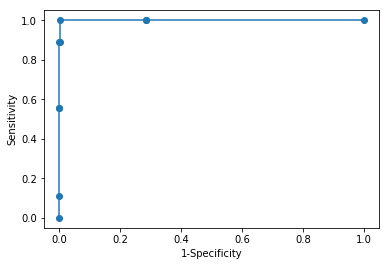

In [37]:
x = fpr
y = tpr

plt.plot(x,y,'o-')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

In [59]:
# auc_score 계산
roc_auc_score(y_test, classifier.decision_function(X_test)) 

0.9997343708495444

In [60]:
res = [[fpr_i, tpr_i, thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]
res

[[0.0, 0.0, 41.27417984123457],
 [0.0, 0.1111111111111111, 40.27417984123457],
 [0.0, 0.5555555555555556, 3.8770405722294985],
 [0.0001406271972999578, 0.5555555555555556, 2.8094375307939234],
 [0.0001406271972999578, 0.8888888888888888, 0.40090710565230525],
 [0.0019687807621994093, 0.8888888888888888, -0.720816210142835],
 [0.0019687807621994093, 1.0, -0.7403168231382475],
 [0.2851919561243144, 1.0, -7.265052319923138],
 [0.28547321051891433, 1.0, -7.267256054183926],
 [1.0, 1.0, -51.71523113553752]]

스케일 후 데이터 X2_train,X2_test,y2_train,y2_test

In [61]:
fpr2, tpr2, thresholds2 = roc_curve(y2_test, classifier2.decision_function(X2_test))
# 순서대로 fpr, tpr, thresholds를 리턴함!
# fpr = 1-specificity
# tpr = sensitivity
# thresholds = 해당 fpr, tpr을 리턴할 때의 thesholds(cut-off) 값!
fpr2, tpr2, thresholds2

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.43763184e-04,
        8.43763184e-04, 4.26803544e-01, 4.27084798e-01, 1.00000000e+00]),
 array([0.        , 0.11111111, 0.88888889, 0.88888889, 1.        ,
        1.        , 1.        , 1.        ]),
 array([ 18.2294302 ,  17.2294302 ,   2.0668131 ,  -2.82565249,
         -2.87550041,  -8.59973489,  -8.6009032 , -21.4020649 ]))

In [62]:
print(roc_curve(y2_test, classifier2.decision_function(X2_test)))

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.43763184e-04,
       8.43763184e-04, 4.26803544e-01, 4.27084798e-01, 1.00000000e+00]), array([0.        , 0.11111111, 0.88888889, 0.88888889, 1.        ,
       1.        , 1.        , 1.        ]), array([ 18.2294302 ,  17.2294302 ,   2.0668131 ,  -2.82565249,
        -2.87550041,  -8.59973489,  -8.6009032 , -21.4020649 ]))


Text(0,0.5,'Sensitivity')

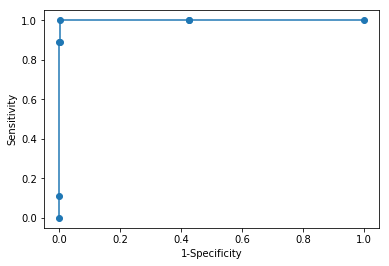

In [63]:
x2 = fpr2
y2 = tpr2

plt.plot(x2,y2,'o-')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

In [36]:
# auc_score 계산
roc_auc_score(y2_test, classifier2.decision_function(X2_test)) 

0.999890623290989

In [37]:
res = [[fpr_i, tpr_i, thres_i] for fpr_i, tpr_i, thres_i in zip(fpr2, tpr2, thresholds2)]
res

[[0.0, 0.0, 17.664415155436778],
 [0.0, 0.1111111111111111, 16.664415155436778],
 [0.0, 0.8888888888888888, 1.4815648507290593],
 [0.0009843903810997047, 0.8888888888888888, -2.7080441214288786],
 [0.0009843903810997047, 1.0, -3.036155345052485],
 [0.43327239488117003, 1.0, -8.731408430454325],
 [0.43355364927576995, 1.0, -8.731506877840456],
 [1.0, 1.0, -21.602388323185103]]

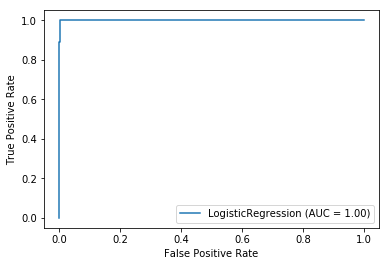

In [43]:
plot_roc_curve(classifier, X_test, y_test, response_method = 'decision_function')

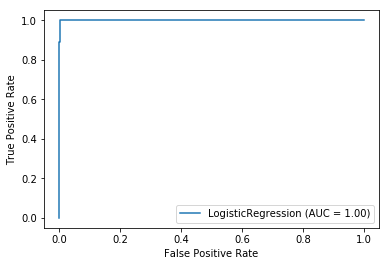

In [44]:
plot_roc_curve(classifier2, X2_test, y2_test, response_method = 'decision_function')

AUC가 1이 나오면 안되는 것도 다 알겠는데. 방법을 못찾겠어서 제출 합니다...  
스케일링 안했던 데이터는 원래 AUC가 1이 아닌 ROC커브를 그렸었는데 이것도 여러번 하니 1로 되어 버렸습니다...  
thresholds를 cut off 로 조정해서 cut off 를 찾아야하는 것도 알겠는데 그럼 따로 roc_curve()함수를 쓰지 말고 하이퍼파라미터를 직접 넣어주는 함수를 짜서 조정해야하나요,,?